# Project Data Mining (Data Understanding)

<table align="left">
    <tr>
        <td style="text-align:left">Kode Mata Kuliah</td>
        <td style="text-align:left">:</td>
        <td style="text-align:left">12S4054
    <tr>
        <td style="text-align:left">Nama Mata Kuliah</td>
        <td style="text-align:left">:</td>
        <td style="text-align:left">Data Mining</td>
    </tr>
    <tr>
        <td style="text-align:left">Project</td>
        <td style="text-align:left">:</td>
        <td style="text-align:left">Case and Cost Prediction (Regression Problem) using Decision Tree
    <tr>
</table>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Read data
data = pd.read_csv("case_cost_prediction_train.csv")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57971 entries, 0 to 57970
Data columns (total 36 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   row_id        57971 non-null  int64  
 1   tglpelayanan  57971 non-null  object 
 2   kddati2       57971 non-null  int64  
 3   tkp           57971 non-null  int64  
 4   peserta       57971 non-null  int64  
 5   a             57971 non-null  int64  
 6   b             57971 non-null  int64  
 7   c             57971 non-null  int64  
 8   cb            57971 non-null  int64  
 9   d             57971 non-null  int64  
 10  ds            57971 non-null  int64  
 11  gd            57971 non-null  int64  
 12  hd            57971 non-null  int64  
 13  i1            57971 non-null  int64  
 14  i2            57971 non-null  int64  
 15  i3            57971 non-null  int64  
 16  i4            57971 non-null  int64  
 17  kb            57971 non-null  int64  
 18  kc            57971 non-nu

In [3]:
#Menampilkan 10 baris pertama
data.head(10)

,row_id,tglpelayanan,kddati2,tkp,peserta,a,b,c,cb,d,...,kp,kt,ku,s,sa,sb,sc,sd,case,unit_cost
0,1,2014-04-01 00:00:00,332,40,179530,0,0,1,0,1,...,0,0,0,0,0,0,0,0,266,3.597440e+06
1,2,2016-11-01 00:00:00,54,40,104782,0,1,0,0,0,...,0,0,1,0,0,0,1,1,2453,4.951008e+06
2,3,2016-05-01 00:00:00,323,30,280645,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1690,1.984208e+05
3,4,2018-11-01 00:00:00,318,40,178685,0,1,0,0,0,...,0,0,0,0,0,0,0,3,1321,4.008756e+06
4,5,2019-10-01 00:00:00,150,30,1199321,1,0,1,0,0,...,1,0,0,0,0,1,0,5,73056,3.072272e+05
5,6,2014-10-01 00:00:00,37,40,110377,0,1,0,0,0,...,0,0,0,0,0,0,1,0,1074,3.426614e+06
6,7,2020-05-01 00:00:00,379,40,105699,0,0,1,0,0,...,0,0,0,0,0,0,0,0,262,2.943943e+06
7,8,2015-09-01 00:00:00,110,40,152065,0,0,1,0,0,...,0,0,0,0,0,0,1,1,1102,3.971695e+06
8,9,2015-03-01 00:00:00,303,30,179081,0,1,0,0,1,...,0,0,0,0,0,0,0,0,5533,2.317746e+05
9,10,2017-11-01 00:00:00,49,30,227227,0,0,1,0,0,...,0,0,0,0,0,0,0,0,6426,1.903432e+05


In [4]:
#Menghitung dan menampilkan beberapa data statistik 
data.describe()

,row_id,kddati2,tkp,peserta,a,b,c,cb,d,ds,...,kp,kt,ku,s,sa,sb,sc,sd,case,unit_cost
count,57971.000000,57971.000000,57971.000000,5.797100e+04,57971.000000,57971.000000,57971.000000,57971.000000,57971.000000,57971.0,...,57971.000000,57971.000000,57971.000000,57971.000000,57971.000000,57971.000000,57971.000000,57971.000000,57971.000000,5.797100e+04
mean,28986.000000,246.423125,34.990081,3.562209e+05,0.041538,0.388574,0.788894,0.000380,0.281710,0.0,...,0.039899,0.004330,0.001829,0.004123,0.002018,0.228476,0.953028,0.644943,6539.418451,1.961092e+06
std,16734.930565,143.447935,5.000033,4.120323e+05,0.210390,0.660382,0.679786,0.019477,0.595284,0.0,...,0.210092,0.065659,0.042722,0.082443,0.044880,0.925357,2.225974,1.234201,17607.280021,1.889367e+06
min,1.000000,1.000000,30.000000,8.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000e+05
25%,14493.500000,125.000000,30.000000,1.127735e+05,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,424.000000,2.336742e+05
50%,28986.000000,243.000000,30.000000,1.975800e+05,0.000000,0.000000,1.000000,0.000000,0.000000,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1359.000000,6.547994e+05
75%,43478.500000,362.000000,40.000000,4.386935e+05,0.000000,1.000000,1.000000,0.000000,0.000000,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,4583.000000,3.531702e+06
max,57971.000000,528.000000,40.000000,3.328509e+06,2.000000,8.000000,6.000000,1.000000,5.000000,0.0,...,2.000000,1.000000,1.000000,5.000000,1.000000,9.000000,25.000000,10.000000,333441.000000,2.690550e+07


In [17]:
#Menghitung dan menampilkan beberapa data tail
data.tail()

,row_id,tglpelayanan,kddati2,tkp,peserta,a,b,c,cb,d,...,kp,kt,ku,s,sa,sb,sc,sd,case,unit_cost
57966,57967,2019-03-01 00:00:00,241,40,157213,0,0,1,0,0,...,0,0,0,0,0,0,0,0,410,3.443332e+06
57967,57968,2019-09-01 00:00:00,338,30,402173,0,0,1,0,0,...,0,0,0,0,0,0,0,0,8272,2.128621e+05
57968,57969,2016-06-01 00:00:00,241,40,99401,0,0,1,0,0,...,0,0,0,0,0,0,0,0,294,3.028611e+06
57969,57970,2018-01-01 00:00:00,147,40,509495,0,0,1,0,0,...,0,0,0,0,0,0,2,0,1983,3.629365e+06
57970,57971,2016-09-01 00:00:00,204,30,770169,0,1,1,0,0,...,0,0,0,0,0,1,2,1,16679,2.956852e+05


In [5]:
data.dtypes

row_id            int64
tglpelayanan     object
kddati2           int64
tkp               int64
peserta           int64
a                 int64
b                 int64
c                 int64
cb                int64
d                 int64
ds                int64
gd                int64
hd                int64
i1                int64
i2                int64
i3                int64
i4                int64
kb                int64
kc                int64
kg                int64
ki                int64
kj                int64
kk                int64
kl                int64
km                int64
ko                int64
kp                int64
kt                int64
ku                int64
s                 int64
sa                int64
sb                int64
sc                int64
sd                int64
case              int64
unit_cost       float64
dtype: object

In [6]:
numerical_vars = ['row_id','kddati2', 'tkp', 'peserta','a', 'b', 'c','cb','d', 'ds', 
                  'gd','hd','i1', 'i2', 'i3', 'i4','kb','kc','kg', 'ki', 'kj',
                  'kk', 'kl', 'km', 'ko', 'kp','kt','ku','s','sa','sb','sc','sd',
                  'case','unit_cost']

In [7]:
data[numerical_vars].corr()

,row_id,kddati2,tkp,peserta,a,b,c,cb,d,ds,...,kp,kt,ku,s,sa,sb,sc,sd,case,unit_cost
row_id,1.000000,0.000232,0.004806,0.001004,-0.000340,0.003964,-0.004531,-0.002933,-0.002806,NaN,...,-0.000030,-0.006730,-0.002346,0.003559,0.005743,0.005183,0.006314,0.000602,0.007574,0.004244
kddati2,0.000232,1.000000,0.000889,-0.322811,-0.123548,-0.269241,-0.185139,-0.004898,0.152947,NaN,...,-0.115667,-0.045977,-0.057413,-0.027376,-0.034931,-0.135862,-0.245343,-0.205379,-0.195391,-0.093774
tkp,0.004806,0.000889,1.000000,-0.000516,-0.001576,-0.002176,0.001160,0.015981,-0.000017,NaN,...,-0.067691,0.000394,-0.001530,0.012026,-0.001064,-0.001505,-0.002684,0.004531,-0.279366,0.907384
peserta,0.001004,-0.322811,-0.000516,1.000000,0.347552,0.590898,0.170167,0.034477,0.166506,NaN,...,0.279015,0.089745,-0.026350,0.039948,0.145526,0.569431,0.654574,0.392445,0.561711,0.141987
a,-0.000340,-0.123548,-0.001576,0.347552,1.000000,0.327321,0.075425,0.055088,0.163857,NaN,...,0.259888,-0.013020,-0.008450,0.086596,0.203044,0.618986,0.329413,0.140970,0.455569,0.180618
b,0.003964,-0.269241,-0.002176,0.590898,0.327321,1.000000,-0.081680,0.058274,0.045645,NaN,...,0.255288,0.111581,0.039628,0.077668,0.041055,0.453759,0.451656,0.366047,0.479891,0.166028
c,-0.004531,-0.185139,0.001160,0.170167,0.075425,-0.081680,1.000000,-0.000463,-0.135705,NaN,...,0.023226,0.021252,-0.049670,-0.025408,0.013400,0.127382,0.086505,-0.013533,0.125083,0.015957
cb,-0.002933,-0.004898,0.015981,0.034477,0.055088,0.058274,-0.000463,1.000000,-0.003270,NaN,...,0.004731,-0.001285,-0.000834,-0.000974,-0.000876,0.039216,0.041790,0.047226,0.004755,0.039635
d,-0.002806,0.152947,-0.000017,0.166506,0.163857,0.045645,-0.135705,-0.003270,1.000000,NaN,...,-0.050565,-0.031207,-0.020255,0.004102,-0.021282,0.251740,0.027522,-0.011800,0.127811,0.003352
ds,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


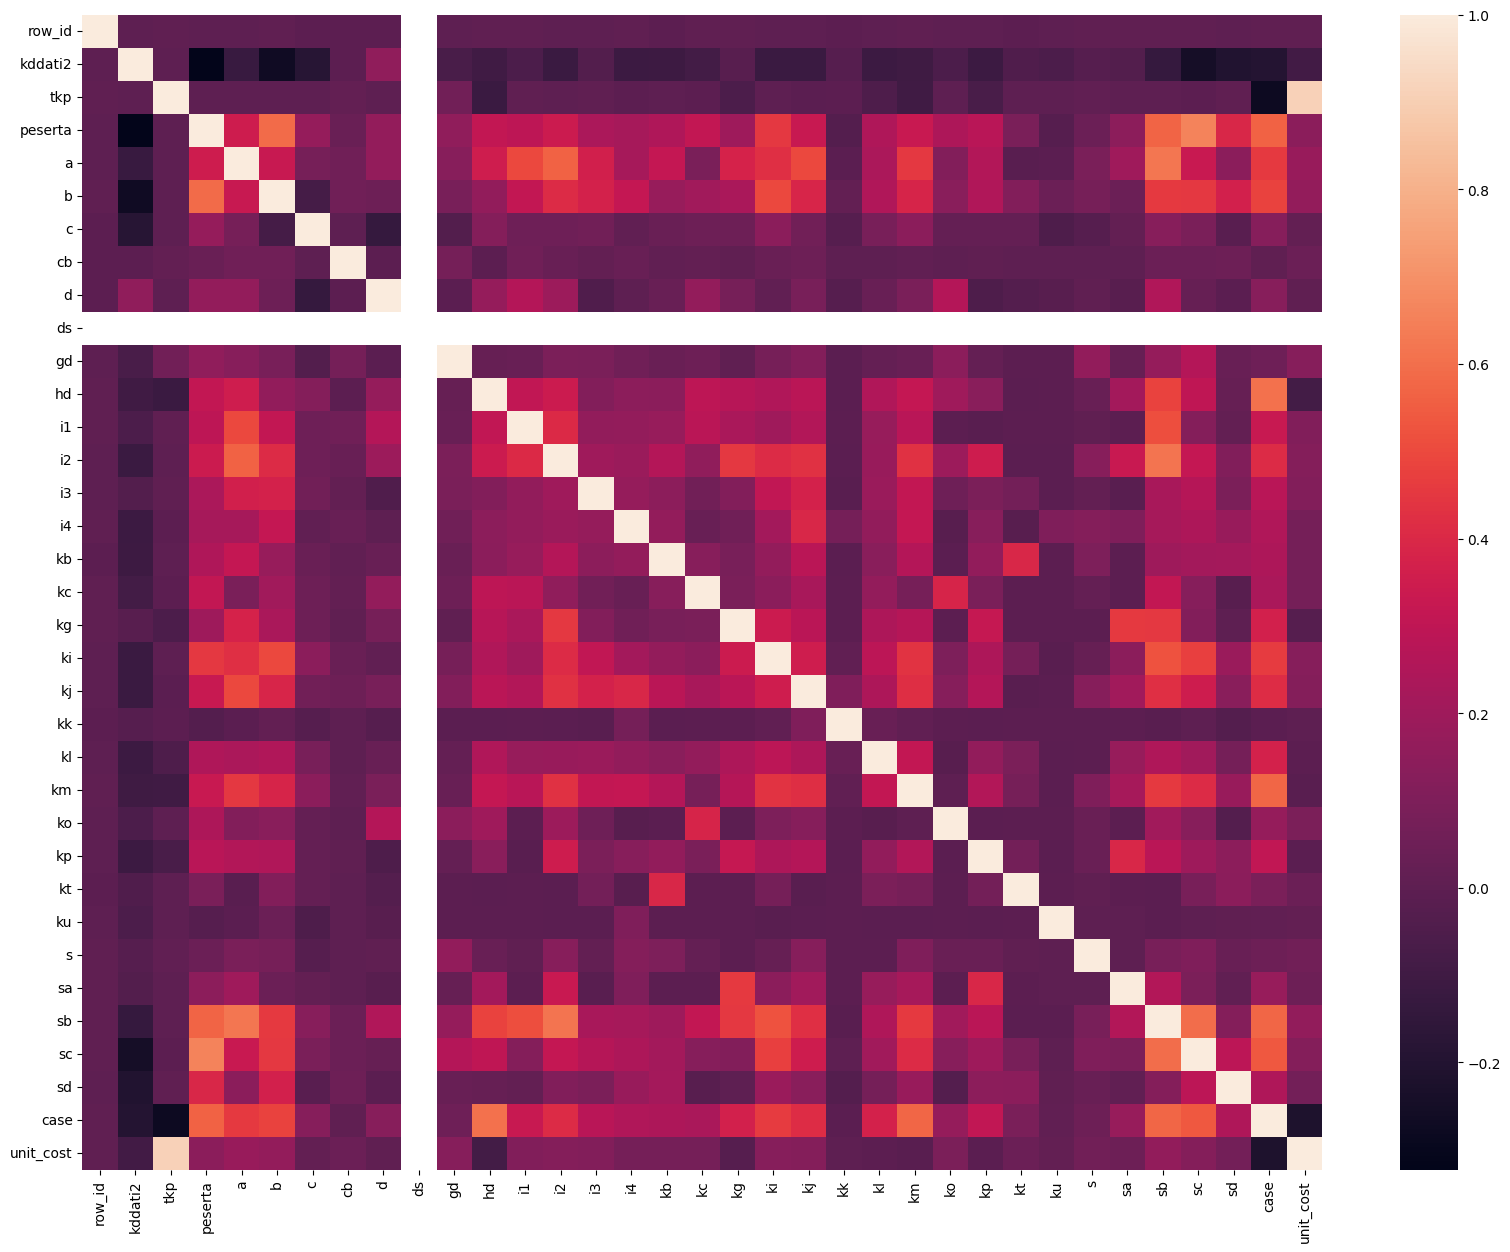

In [8]:
correlations = data[numerical_vars].corr()
fig, ax = plt.subplots(figsize=(20,15))
sns.heatmap(correlations, ax = ax);

In [9]:
#Menghitung dan menampilkan beberapa data statistik tabel unit_cost
data['unit_cost'].describe()

count    5.797100e+04
mean     1.961092e+06
std      1.889367e+06
min      1.000000e+05
25%      2.336742e+05
50%      6.547994e+05
75%      3.531702e+06
max      2.690550e+07
Name: unit_cost, dtype: float64

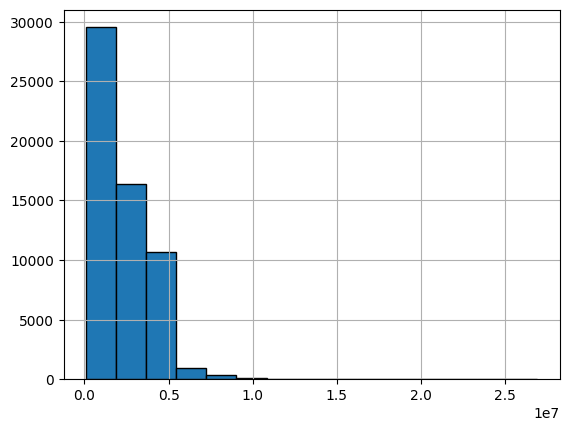

In [10]:
data['unit_cost'].hist(edgecolor = 'black', bins=15);

In [11]:
#Menghitung dan menampilkan beberapa data statistik tabel kddati2
data['kddati2'].describe()

count    57971.000000
mean       246.423125
std        143.447935
min          1.000000
25%        125.000000
50%        243.000000
75%        362.000000
max        528.000000
Name: kddati2, dtype: float64

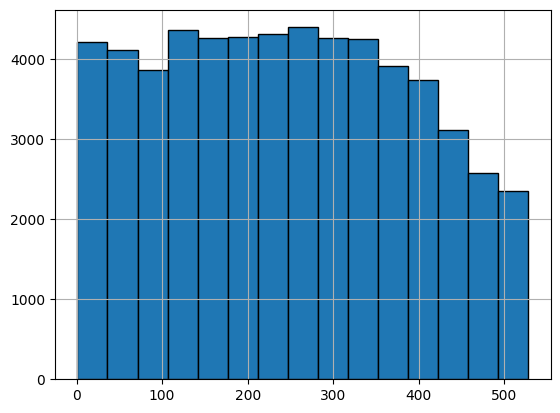

In [12]:
data['kddati2'].hist(edgecolor = 'black', bins=15);

In [13]:
#Menghitung dan menampilkan beberapa data statistik tabel peserta
data['peserta'].describe()

count    5.797100e+04
mean     3.562209e+05
std      4.120323e+05
min      8.000000e+00
25%      1.127735e+05
50%      1.975800e+05
75%      4.386935e+05
max      3.328509e+06
Name: peserta, dtype: float64

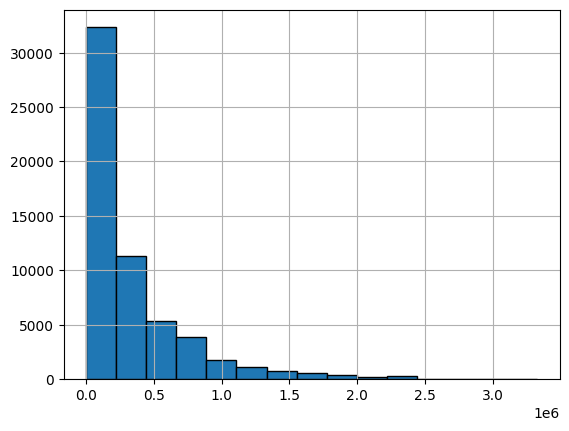

In [14]:
data['peserta'].hist(edgecolor = 'black', bins=15);

In [15]:
#Menghitung dan menampilkan beberapa data statistik tabel case
data['case'].describe()

count     57971.000000
mean       6539.418451
std       17607.280021
min           1.000000
25%         424.000000
50%        1359.000000
75%        4583.000000
max      333441.000000
Name: case, dtype: float64

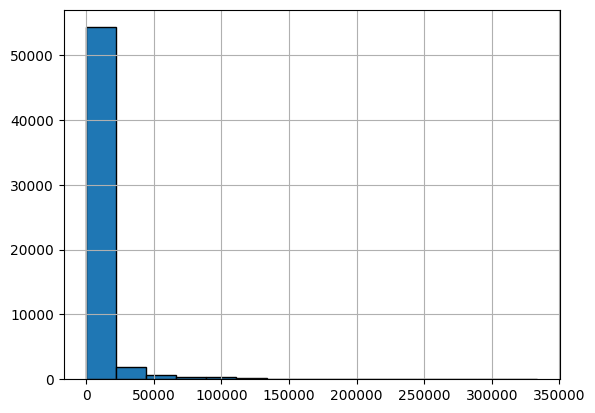

In [16]:
data['case'].hist(edgecolor = 'black', bins=15);